# Datos de Tráfico en Barcelona
## -Descargaremos los datos disponibles para los años 2018 y 2019¶
## -Descartaremos los datos no relevantes para medir la intensidad de trafico de las calles de la ciudad de Barcelona.
## -Analizamos el estado del tráfico por horas, por franjas del día, por fines de semana
## -Agruparemos los datos a medias por dia
## -Sacaremos un csv resultado a mergear con las otras ramas (meteo y calidad del aire)

In [1]:
import numpy as np
import pandas as pd
#Visualización
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Obtenemos las URLs de los 24 ficheros mensuales de datos

url_fichero_ene18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/106e94c9-3e95-4d1e-be4e-917137845cc0/download'
url_fichero_feb18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/2df09282-d7aa-48c5-b616-964b4ef97a1e/download'
url_fichero_mar18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/0e2506ae-37a3-4a9d-98b0-18750628bdc9/download'
url_fichero_abr18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/298ec97f-b2d6-4c61-b6b7-b464d1c090df/download'
url_fichero_may18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/c9e18685-1ce7-48c2-9c78-50aa578e1c69/download'
url_fichero_jun18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/4c6f2bf0-bac6-4626-ace1-010d353d21a0/download'
url_fichero_jul18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d017ba9d-13df-4403-8ba6-e5f1854ddff0/download'
url_fichero_ago18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/93009385-a4b4-47f6-b353-2326cafc9d91/download'
url_fichero_sep18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/b04fa564-5e34-4b9c-98b8-032ceab110c5/download'
url_fichero_oct18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/cf0679d1-746e-4486-931b-a8a1b3d6ed8d/download'
url_fichero_nov18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/690ad8d0-c83e-45d4-b412-29feb45a6963/download'
url_fichero_dic18 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/2e92ddcb-587c-4f38-93d6-92429b885a59/download'
url_fichero_ene19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f5186a0b-7903-40eb-b07b-f8f487e3134c/download'
url_fichero_feb19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f071dd67-0e70-4295-8637-42ce91e978a1/download'
url_fichero_mar19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/934096c7-3c39-448a-b3df-dbd7a4f3643a/download'
url_fichero_abr19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/07d0bb21-59c9-47a5-b171-0a363137f331/download'
url_fichero_may19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d335dd1a-4cd0-4eac-acb7-5ae943bcd978/download'
url_fichero_jun19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/c6fd68b4-7bc1-4a75-978e-8ae86719ccfb/download'
url_fichero_jul19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/472171fd-18b8-4eb5-a47a-e3c50af2d053/download'
url_fichero_ago19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/d94e693b-8f9e-4557-b7f2-d64366e66321/download'
url_fichero_sep19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/94849c87-a5dc-42de-b684-66bc8248cdfa/download'
url_fichero_oct19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/f9875fd1-0b07-49e7-aae9-eab3a230d450/download'
url_fichero_nov19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/179f4829-0975-4b62-acea-364dc10c9e4d/download'
url_fichero_dic19 = 'https://opendata-ajuntament.barcelona.cat/data/dataset/8319c2b1-4c21-4962-9acd-6db4c5ff1148/resource/32716fbe-bf60-4089-9b21-2bd61cafa094/download'

#Generamos 24 dataframes, uno por cada mes

dfTrafEne18 = pd.read_csv(url_fichero_ene18)
dfTrafFeb18 = pd.read_csv(url_fichero_feb18)
dfTrafMar18 = pd.read_csv(url_fichero_mar18)
dfTrafAbr18 = pd.read_csv(url_fichero_abr18)
dfTrafMay18 = pd.read_csv(url_fichero_may18)
dfTrafJun18 = pd.read_csv(url_fichero_jun18)
dfTrafJul18 = pd.read_csv(url_fichero_jul18)
dfTrafAgo18 = pd.read_csv(url_fichero_ago18)
dfTrafSep18 = pd.read_csv(url_fichero_sep18)
dfTrafOct18 = pd.read_csv(url_fichero_oct18)
dfTrafNov18 = pd.read_csv(url_fichero_nov18)
dfTrafDic18 = pd.read_csv(url_fichero_dic18)
dfTrafEne19 = pd.read_csv(url_fichero_ene19)
dfTrafFeb19 = pd.read_csv(url_fichero_feb19)
dfTrafMar19 = pd.read_csv(url_fichero_mar19)
dfTrafAbr19 = pd.read_csv(url_fichero_abr19)
dfTrafMay19 = pd.read_csv(url_fichero_may19)
dfTrafJun19 = pd.read_csv(url_fichero_jun19)
dfTrafJul19 = pd.read_csv(url_fichero_jul19)
dfTrafAgo19 = pd.read_csv(url_fichero_ago19)
dfTrafSep19 = pd.read_csv(url_fichero_sep19)
dfTrafOct19 = pd.read_csv(url_fichero_oct19)
dfTrafNov19 = pd.read_csv(url_fichero_nov19)
dfTrafDic19 = pd.read_csv(url_fichero_dic19)

#Concatenamos los 12 ficheros del 2018 en un dataframe y los 12 ficheros del 2019 en otro dataframe

dfTrafBarcelona18 = pd.concat([dfTrafEne18,dfTrafFeb18,dfTrafMar18,dfTrafAbr18,dfTrafMay18,dfTrafJun18,dfTrafJul18,dfTrafAgo18,dfTrafSep18,dfTrafOct18,dfTrafNov18,dfTrafDic18])
dfTrafBarcelona19 = pd.concat([dfTrafEne19,dfTrafFeb19,dfTrafMar19,dfTrafAbr19,dfTrafMay19,dfTrafJun19,dfTrafJul19,dfTrafAgo19,dfTrafSep19,dfTrafOct19,dfTrafNov19,dfTrafDic19])

#Finalmente concatenamos los 2 dataframes anuales en un solo dataframe con ambos años

dfTrafBarcelona18_19 = pd.concat([dfTrafBarcelona18,dfTrafBarcelona19])

print(dfTrafBarcelona18_19.columns)
print(dfTrafBarcelona18_19)

Index(['idTram', 'data', 'estatActual', 'estatPrevist'], dtype='object')
         idTram            data  estatActual  estatPrevist
0             1  20180101000554            0             0
1             2  20180101000554            0             0
2             3  20180101000554            0             0
3             4  20180101000554            0             0
4             5  20180101000554            0             0
...         ...             ...          ...           ...
4638122     530  20191231235553            1             0
4638123     531  20191231235553            1             0
4638124     532  20191231235553            1             0
4638125     533  20191231235553            1             5
4638126     534  20191231235553            1             0

[55159214 rows x 4 columns]


El dataframe completo contiene unos 55 Mill de registros

In [2]:
#Obtenemos el nº de registros que contiene cada dataframe mensual

print('dfTrafEne18: ',dfTrafEne18.shape)
print('dfTrafFeb18: ',dfTrafFeb18.shape)
print('dfTrafMar18: ',dfTrafMar18.shape)
print('dfTrafAbr18: ',dfTrafAbr18.shape)
print('dfTrafMay18: ',dfTrafMay18.shape)
print('dfTrafJun18: ',dfTrafJun18.shape)
print('dfTrafJul18: ',dfTrafJul18.shape)
print('dfTrafAgo18: ',dfTrafAgo18.shape)
print('dfTrafSep18: ',dfTrafSep18.shape)
print('dfTrafOct18: ',dfTrafOct18.shape)
print('dfTrafNov18: ',dfTrafNov18.shape)
print('dfTrafDic18: ',dfTrafDic18.shape)
print('dfTrafEne19: ',dfTrafEne19.shape)
print('dfTrafFeb19: ',dfTrafFeb19.shape)
print('dfTrafMar19: ',dfTrafMar19.shape)
print('dfTrafAbr19: ',dfTrafAbr19.shape)
print('dfTrafMay19: ',dfTrafMay19.shape)
print('dfTrafJun19: ',dfTrafJun19.shape)
print('dfTrafJul19: ',dfTrafJul19.shape)
print('dfTrafAgo19: ',dfTrafAgo19.shape)
print('dfTrafSep19: ',dfTrafSep19.shape)
print('dfTrafOct19: ',dfTrafOct19.shape)
print('dfTrafNov19: ',dfTrafNov19.shape)
print('dfTrafDic19: ',dfTrafDic19.shape)

dfTrafEne18:  (827166, 4)
dfTrafFeb18:  (742260, 4)
dfTrafMar18:  (807942, 4)
dfTrafAbr18:  (792456, 4)
dfTrafMay18:  (780174, 4)
dfTrafJun18:  (846924, 4)
dfTrafJul18:  (920616, 4)
dfTrafAgo18:  (927096, 4)
dfTrafSep18:  (909298, 4)
dfTrafOct18:  (1019629, 4)
dfTrafNov18:  (929019, 4)
dfTrafDic18:  (990847, 4)
dfTrafEne19:  (951405, 4)
dfTrafFeb19:  (752063, 4)
dfTrafMar19:  (1516918, 4)
dfTrafAbr19:  (4540627, 4)
dfTrafMay19:  (4637618, 4)
dfTrafJun19:  (4537470, 4)
dfTrafJul19:  (4681868, 4)
dfTrafAgo19:  (4695043, 4)
dfTrafSep19:  (4543267, 4)
dfTrafOct19:  (4677652, 4)
dfTrafNov19:  (4493729, 4)
dfTrafDic19:  (4638127, 4)


In [3]:
#Observamos el dataframe del año 2018 y vemos que contiene 10 Mill y medio de registros 
dfTrafBarcelona18

,idTram,data,estatActual,estatPrevist
0,1,20180101000554,0,0
1,2,20180101000554,0,0
2,3,20180101000554,0,0
3,4,20180101000554,0,0
4,5,20180101000554,0,0
...,...,...,...,...
990842,602,20181231234051,0,0
990843,604,20181231234051,0,0
990844,2001,20181231234051,0,0
990845,2002,20181231234051,0,0


In [4]:
#Observamos el del año 2019 y vemos que contiene los restantes 44 Mill y medio
dfTrafBarcelona19

,idTram,data,estatActual,estatPrevist
0,1,20190101000551,0,0
1,2,20190101000551,0,0
2,3,20190101000551,0,0
3,4,20190101000551,0,0
4,5,20190101000551,0,0
...,...,...,...,...
4638122,530,20191231235553,1,0
4638123,531,20191231235553,1,0
4638124,532,20191231235553,1,0
4638125,533,20191231235553,1,5


In [5]:
#Miramos los tipos de los campos recogidos
dfTrafBarcelona18_19.dtypes

idTram          int64
data            int64
estatActual     int64
estatPrevist    int64
dtype: object

In [6]:
#Miramos ahora si los datos traen datos faltantes NaN
dfTrafBarcelona18_19.isnull().sum()

idTram          0
data            0
estatActual     0
estatPrevist    0
dtype: int64

Observamos que el dataset no trae datos faltantes

In [7]:
dfTrafBarcelona18_19.describe()

,idTram,data,estatActual,estatPrevist
count,5.515921e+07,5.515921e+07,5.515921e+07,5.515921e+07
mean,2.695084e+02,2.018886e+13,1.000939e+00,9.130845e-01
std,1.753607e+02,3.967633e+09,1.103935e+00,1.136178e+00
min,1.000000e+00,2.018010e+13,0.000000e+00,0.000000e+00
25%,1.330000e+02,2.019040e+13,0.000000e+00,0.000000e+00
50%,2.650000e+02,2.019070e+13,1.000000e+00,0.000000e+00
75%,3.980000e+02,2.019100e+13,2.000000e+00,2.000000e+00
max,2.004000e+03,2.019123e+13,6.000000e+00,6.000000e+00


El campo 'estatActual' (Estado actual) es el campo clave para nuestro análisis. Es el campo que da la medida del estado del tráfico en cada tramo de la ciudad y en cada tiempo. Los estados pueden ser: 

0 = sin datos / 1 = muy fluido / 2 = fluido / 3 = denso / 4 = muy denso / 5 = congestión / 6 = cortado 

Por tanto, se trata de una medida cualitativa (clasificada de 1 a 6). 

El 0 es falta de dato, por lo que necesitamos averiguar cuántos registros contienen 0 en este campo, y habrá que quitarlos.

In [8]:
dfTrafBarcelona18_19['estatActual'].value_counts()

0    25089970
2    15642094
1    10679988
3     2375305
4      841672
5      426871
6      103314
Name: estatActual, dtype: int64

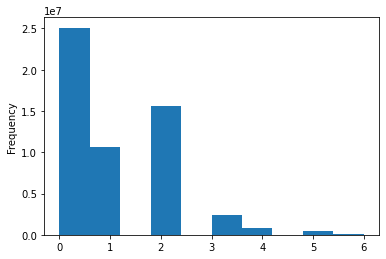

In [9]:
dfTrafBarcelona18_19['estatActual'].plot.hist();

De los 55 Mill de registros, unos 25 Mill no tienen medida del tráfico (tienen valor 0). 
Vamos a quitarlos.

In [10]:
#Reseteamos el índice para que sea un número correlativo desde 0 hasta el último nº de fila.
dfTrafBarcelona18_19 = dfTrafBarcelona18_19.reset_index()
print(dfTrafBarcelona18_19)

            index  idTram            data  estatActual  estatPrevist
0               0       1  20180101000554            0             0
1               1       2  20180101000554            0             0
2               2       3  20180101000554            0             0
3               3       4  20180101000554            0             0
4               4       5  20180101000554            0             0
...           ...     ...             ...          ...           ...
55159209  4638122     530  20191231235553            1             0
55159210  4638123     531  20191231235553            1             0
55159211  4638124     532  20191231235553            1             0
55159212  4638125     533  20191231235553            1             5
55159213  4638126     534  20191231235553            1             0

[55159214 rows x 5 columns]


In [11]:
#Eliminamos las filas que tienen 0 en el campo Estado Actual. Nos quedan por tanto unos 30 Mill de registros
dfTrafBarcelona18_19 = dfTrafBarcelona18_19.drop(dfTrafBarcelona18_19[dfTrafBarcelona18_19['estatActual']==0].index)
print(dfTrafBarcelona18_19)

            index  idTram            data  estatActual  estatPrevist
7               7       8  20180101000554            2             0
36             36      37  20180101000554            1             5
82             82      83  20180101000554            1             0
96             96      97  20180101000554            1             0
98             98      99  20180101000554            4             0
...           ...     ...             ...          ...           ...
55159209  4638122     530  20191231235553            1             0
55159210  4638123     531  20191231235553            1             0
55159211  4638124     532  20191231235553            1             0
55159212  4638125     533  20191231235553            1             5
55159213  4638126     534  20191231235553            1             0

[30069244 rows x 5 columns]


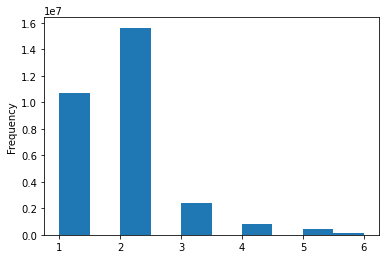

In [12]:
#Volvemos a pintar el histograma habiendo quitado los registros sin dato medido
dfTrafBarcelona18_19['estatActual'].plot.hist();

Eliminamos las columnas que no nos interesan para nuestro análisis: el antiguo index y el estado previsto

In [13]:
dfTrafBarcelona18_19 = dfTrafBarcelona18_19.drop(columns=['index','estatPrevist'])
print(dfTrafBarcelona18_19)

          idTram            data  estatActual
7              8  20180101000554            2
36            37  20180101000554            1
82            83  20180101000554            1
96            97  20180101000554            1
98            99  20180101000554            4
...          ...             ...          ...
55159209     530  20191231235553            1
55159210     531  20191231235553            1
55159211     532  20191231235553            1
55159212     533  20191231235553            1
55159213     534  20191231235553            1

[30069244 rows x 3 columns]


Ahora vamos a convertir el campo 'data' en formato Fecha para convertirlo en Indice

In [14]:
#Convertimos el campo 'data' en formato fecha
dfTrafBarcelona18_19['data'] = pd.to_datetime(dfTrafBarcelona18_19['data'], format='%Y%m%d%H%M%S')
print(dfTrafBarcelona18_19)

          idTram                data  estatActual
7              8 2018-01-01 00:05:54            2
36            37 2018-01-01 00:05:54            1
82            83 2018-01-01 00:05:54            1
96            97 2018-01-01 00:05:54            1
98            99 2018-01-01 00:05:54            4
...          ...                 ...          ...
55159209     530 2019-12-31 23:55:53            1
55159210     531 2019-12-31 23:55:53            1
55159211     532 2019-12-31 23:55:53            1
55159212     533 2019-12-31 23:55:53            1
55159213     534 2019-12-31 23:55:53            1

[30069244 rows x 3 columns]


In [15]:
#Renombramos los campos
dfTrafBarcelona18_19.rename(columns = {'data': 'Fecha', 'estatActual': 'Estado_Actual'}, inplace = True)
print(dfTrafBarcelona18_19)

          idTram               Fecha  Estado_Actual
7              8 2018-01-01 00:05:54              2
36            37 2018-01-01 00:05:54              1
82            83 2018-01-01 00:05:54              1
96            97 2018-01-01 00:05:54              1
98            99 2018-01-01 00:05:54              4
...          ...                 ...            ...
55159209     530 2019-12-31 23:55:53              1
55159210     531 2019-12-31 23:55:53              1
55159211     532 2019-12-31 23:55:53              1
55159212     533 2019-12-31 23:55:53              1
55159213     534 2019-12-31 23:55:53              1

[30069244 rows x 3 columns]


In [16]:
#Convertimos la fecha en el índice
dfTrafBarcelona18_19 = dfTrafBarcelona18_19.set_index('Fecha')
print(dfTrafBarcelona18_19)

                     idTram  Estado_Actual
Fecha                                     
2018-01-01 00:05:54       8              2
2018-01-01 00:05:54      37              1
2018-01-01 00:05:54      83              1
2018-01-01 00:05:54      97              1
2018-01-01 00:05:54      99              4
...                     ...            ...
2019-12-31 23:55:53     530              1
2019-12-31 23:55:53     531              1
2019-12-31 23:55:53     532              1
2019-12-31 23:55:53     533              1
2019-12-31 23:55:53     534              1

[30069244 rows x 2 columns]


Y ahora agrupamos todos los datos por día calculando las medias por día. Recordamos que todos los valores dados para un día son en los diferentes tramos y en los diferentes minutos. Estamos así obteniendo el estado medio del tráfico por día en toda la ciudad. 

Al agrupar por la media estamos convirtiendo el campo Estado en una medida continua, no clasificada. Lo preferimos así para obtener un rango mayor de medidas, pues si usásemos la mediana sólo obtendríamos dos valores diferentes en todo el dataframe: '1' y '2', muchísimo más frecuentes que el resto de valores.

In [17]:
dfTrafBarcelona18_19_pordias = dfTrafBarcelona18_19.resample('D').mean()
print(dfTrafBarcelona18_19_pordias)

                idTram  Estado_Actual
Fecha                                
2018-01-01  253.798995       1.476337
2018-01-02  257.556842       1.783059
2018-01-03  258.452151       1.831938
2018-01-04  255.930703       1.826063
2018-01-05  256.203031       1.827071
...                ...            ...
2019-12-27  259.123580       1.793782
2019-12-28  262.458555       1.595028
2019-12-29  263.415308       1.497768
2019-12-30  258.533968       1.812790
2019-12-31  259.982932       1.735513

[730 rows x 2 columns]


In [18]:
#Comprobamos si ha quedado algún día sin dato (la función resample('D') lo habrá registrado con un NaN )

dfTrafBarcelona18_19_pordias.isnull().sum()

idTram           0
Estado_Actual    0
dtype: int64

No ha quedado ningún día sin dato medio de tráfico, pese a que ha habido días con pocos datos.

Eliminamos el campo idtram que ahora no tiene sentido

In [19]:
dfTrafBarcelona18_19_pordias = dfTrafBarcelona18_19_pordias.drop(columns=['idTram'])

In [20]:
dfTrafBarcelona18_19_pordias.describe()

,Estado_Actual
count,730.000000
mean,1.842766
std,0.181867
min,1.397158
25%,1.671607
50%,1.922874
75%,1.989925
max,2.199561


Exportamos a un fichero csv el dataframe trabajado resultante

In [21]:
dfTrafBarcelona18_19_pordias.to_csv('DatosEstadoTraficoBarcelona.csv')

El problema es que nos quedan tan solo valores de Estado de entre 1.397 y 2.2, como medias de cada día. Esto se debe a:

- que muchos tramos de la ciudad son de tráfico fluido y al hacer media con los tramos más congestionados invisibilizan dicha congestión. 
- que la cantidad de horas en que el tráfico está más congestionado es pequeña en relación a las 24 h del día. La mayor parte de esas 24 h, el tráfico se mantiene fluido. 
- y que están incluidos los fines de semana, en los que se supone que el tráfico es más fluido.

Para intentar dar más relevancia al tráfico que sucede durante el día, vamos a **segmentar nuestro dataframe en tres franjas**: madrugada (de 23 h a 6 h), mañana (de 6 h a 14 h) y tarde (de 14 h a 23 h), para ver sus histogramas por separado, y decidir si quitamos los datos correspondientes a la madrugada.

También vamos a analizar la **diferencia** que se pueda notar **entre fines de semana y días laborables**.

Por último analizaremos las **diferencias entre tramos** de la ciudad

In [22]:
dfTrafBarcelona18_19['hora'] = dfTrafBarcelona18_19.index.hour
franjas = {
             0: 'Madrugada',
             1: 'Madrugada',
             2: 'Madrugada',
             3: 'Madrugada',
             4: 'Madrugada',
             5: 'Madrugada',
             6: 'Mañana',
             7: 'Mañana',
             8: 'Mañana',
             9: 'Mañana',
             10: 'Mañana',
             11: 'Mañana',
             12: 'Mañana',
             13: 'Mañana',
             14: 'Tarde',
             15: 'Tarde',
             16: 'Tarde',
             17: 'Tarde',
             18: 'Tarde',
             19: 'Tarde',
             20: 'Tarde',
             21: 'Tarde',
             22: 'Tarde',
             23: 'Madrugada'
}
dfTrafBarcelona18_19['franja'] = dfTrafBarcelona18_19['hora'].map(franjas)
dfTrafBarcelona18_19['diadelasemana'] = dfTrafBarcelona18_19.index.dayofweek
dfTrafBarcelona18_19['findesemana'] = (dfTrafBarcelona18_19.index.dayofweek // 5 == 1).astype(int)
print(dfTrafBarcelona18_19)

                     idTram  Estado_Actual  hora     franja  diadelasemana  \
Fecha                                                                        
2018-01-01 00:05:54       8              2     0  Madrugada              0   
2018-01-01 00:05:54      37              1     0  Madrugada              0   
2018-01-01 00:05:54      83              1     0  Madrugada              0   
2018-01-01 00:05:54      97              1     0  Madrugada              0   
2018-01-01 00:05:54      99              4     0  Madrugada              0   
...                     ...            ...   ...        ...            ...   
2019-12-31 23:55:53     530              1    23  Madrugada              1   
2019-12-31 23:55:53     531              1    23  Madrugada              1   
2019-12-31 23:55:53     532              1    23  Madrugada              1   
2019-12-31 23:55:53     533              1    23  Madrugada              1   
2019-12-31 23:55:53     534              1    23  Madrugada     

In [23]:
dfTrafBarcelona18_19.franja.value_counts()

Tarde        14059447
Mañana       11419498
Madrugada     4590299
Name: franja, dtype: int64

In [24]:
dfTrafBarcelona18_19.diadelasemana.value_counts()

4    4499894
3    4371069
5    4330666
0    4294306
1    4293597
2    4243027
6    4036685
Name: diadelasemana, dtype: int64

Los días de la semana van de 0=Lunes a 6=Domingo

In [25]:
dfTrafBarcelona18_19.findesemana.value_counts()

0    21701893
1     8367351
Name: findesemana, dtype: int64

El campo findesemana vale 1 cuando se trata de fin de semana y 0 cuando es día laborable

Comprobamos la distribución del tráfico a lo largo de las 24 horas del día

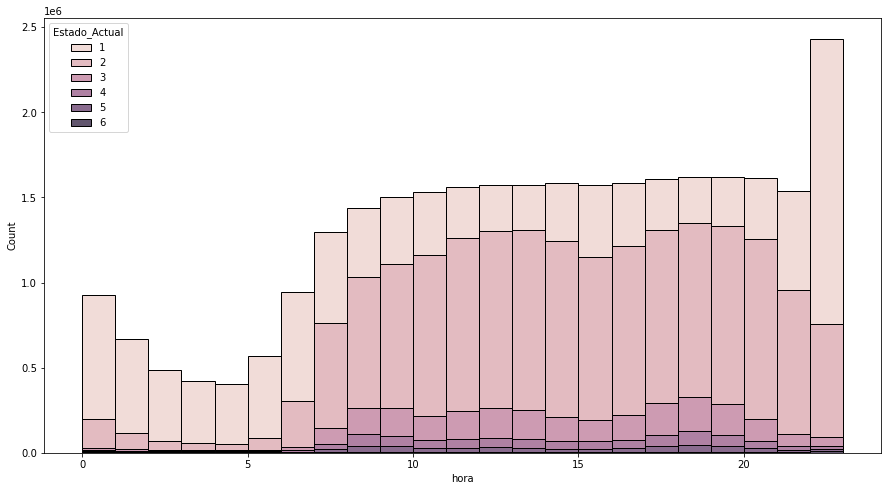

In [26]:
plt.figure(figsize=(15,8))
sns.histplot(data=dfTrafBarcelona18_19, x='hora', hue='Estado_Actual', binwidth=1, multiple="stack");

Vemos que en realidad a cualquier hora, el tráfico es mucho más frecuentemente fluido que congestionado. Las medias seguirán dándonos valores bajos de tráfico, pero de todas formas continuamos.

Vamos a visualizar en histograma la distribución del tráfico en las 3 franjas

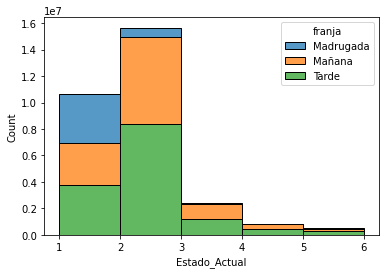

In [27]:
#Juntos en un único gráfico
sns.histplot(data=dfTrafBarcelona18_19, x='Estado_Actual', hue='franja', binwidth=1, multiple="stack");

Comprobamos que efectivamente durante la madrugada no hay casi tráfico, y vamos a mirarlo en un gráfico propio.

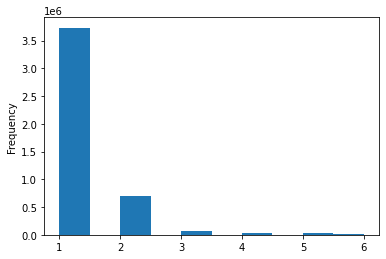

In [28]:
dfTrafBarcelona18_19['Estado_Actual'].loc[dfTrafBarcelona18_19['franja']=='Madrugada'].plot.hist();

**Vamos a quitar por tanto los registros de las horas de madrugada**, para así centrar nuestro análisis en la influencia de las horas del día.

In [29]:
dfTrafBarcelona18_19_sinmadrugadas = dfTrafBarcelona18_19.loc[dfTrafBarcelona18_19['franja']!='Madrugada']
print(dfTrafBarcelona18_19_sinmadrugadas)

                     idTram  Estado_Actual  hora  franja  diadelasemana  \
Fecha                                                                     
2018-01-01 06:00:55       2              1     6  Mañana              0   
2018-01-01 06:00:55       4              1     6  Mañana              0   
2018-01-01 06:00:55       6              1     6  Mañana              0   
2018-01-01 06:00:55       8              1     6  Mañana              0   
2018-01-01 06:00:55      37              3     6  Mañana              0   
...                     ...            ...   ...     ...            ...   
2019-12-31 22:55:52     530              1    22   Tarde              1   
2019-12-31 22:55:52     531              1    22   Tarde              1   
2019-12-31 22:55:52     532              1    22   Tarde              1   
2019-12-31 22:55:52     533              1    22   Tarde              1   
2019-12-31 22:55:52     534              1    22   Tarde              1   

                     fin

Vamos ahora a mirar las posibles diferencias entre fines de semana (valor 'findesemana' = 1) y días laborables (valor 'findesemana' = 0)

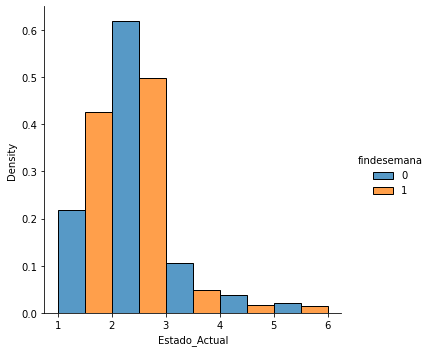

In [30]:
sns.displot(data=dfTrafBarcelona18_19_sinmadrugadas, x='Estado_Actual', hue='findesemana', binwidth=1, 
            stat="density", common_norm=False, multiple="dodge");

Se percibe que en fines de semana (valor 1, color naranja) es mayor la proporción de tiempo en tráfico fluido (suma de estados 1 y 2 es aproximadamente 0,93) que en días laborables (misma suma en torno a 0,83).

Sin embargo la diferencia no es muy grande, y **no quitaremos los registros de fines de semana**.

Por último para hacer un estudio por tramos, contamos primero los registros que hay por cada tramo

In [31]:
dfTrafBarcelona18_19_sinmadrugadas.idTram.value_counts()

532    73559
531    73556
518    73553
504    73547
525    73545
       ...  
335        4
284        3
383        2
32         2
190        1
Name: idTram, Length: 483, dtype: int64

Observamos que hay tramos con muy pocas medidas tomadas a lo largo de los 2 años. Se podría quitar dichos tramos por considerarse despreciable su muestra de datos. Habría que decidir (iterar y probar) el límite de nº de medidas por el que hacer el corte. Por ejemplo quitar aquellos tramos con menos de 730 medidas, considerando que cada tramo debería tener al menos una medida al día.

Obtenemos ahora los estados máximo y medio de cada tramo

In [32]:
dfTrafBarcelona18_19_sinmadrugadas_mediastramo= dfTrafBarcelona18_19_sinmadrugadas.groupby('idTram').mean().sort_values(by='idTram')
dfTrafBarcelona18_19_sinmadrugadas_maximostramo= dfTrafBarcelona18_19_sinmadrugadas.groupby('idTram').max().sort_values(by='idTram')
dfTrafBarcelona18_19_sinmadrugadas_tramos = pd.merge(
    dfTrafBarcelona18_19_sinmadrugadas_mediastramo.Estado_Actual, 
    dfTrafBarcelona18_19_sinmadrugadas_maximostramo.Estado_Actual, 
    left_index=True, right_index=True)
dfTrafBarcelona18_19_sinmadrugadas_tramos = dfTrafBarcelona18_19_sinmadrugadas_tramos.rename(columns={'Estado_Actual_x': 'media_EstAct', 'Estado_Actual_y': 'max_EstAct'})

In [33]:
print('\033[1m' + 'Ordenado por Medias\n\n'+ '\033[0m', 
      dfTrafBarcelona18_19_sinmadrugadas_tramos.sort_values(by='media_EstAct'))
print('\033[1m' + 'Ordenado por Máximos y Medias\n\n'+ '\033[0m', 
      dfTrafBarcelona18_19_sinmadrugadas_tramos.sort_values(by=['max_EstAct', 'media_EstAct']))

Ordenado por Medias

         media_EstAct  max_EstAct
idTram                          
233         1.036854           5
198         1.039999           6
315         1.048355           6
422         1.059650           6
424         1.073362           6
...              ...         ...
337         6.000000           6
335         6.000000           6
317         6.000000           6
492         6.000000           6
249         6.000000           6

[483 rows x 2 columns]
Ordenado por Máximos y Medias

         media_EstAct  max_EstAct
idTram                          
2001        1.895210           2
2002        1.913408           2
78          1.983683           2
80          1.983692           2
222         1.603092           3
...              ...         ...
489         6.000000           6
490         6.000000           6
492         6.000000           6
493         6.000000           6
494         6.000000           6

[483 rows x 2 columns]


Pintamos los estados máximo y medio de cada tramo ordenado primero por los máximos y después por los medios

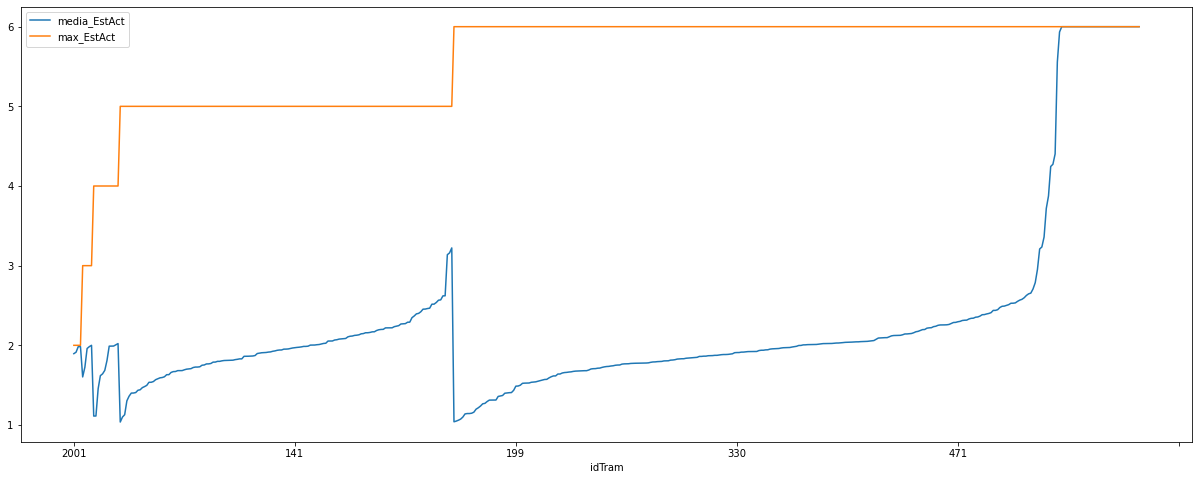

In [34]:
dfplot = dfTrafBarcelona18_19_sinmadrugadas_tramos.sort_values(by=['max_EstAct', 'media_EstAct'])
dfplot.index = dfplot.index.astype(str)

dfplot.plot(figsize=(21, 8));

Entonces podríamos probar a quitar:
- aquellos tramos cuyas medias sean muy bajas (por ejemplo inferior a 1,5) independientemente de sus máximos, 
- y aquellos tramos cuyos máximos sean de 2.

Sin embargo no nos metemos ahora en estas pruebas de quitar tramos, porque habría que probar todo el estudio hasta el final iterando con distintos criterios, y no nos da tiempo. **De momento no quitamos ningún tramo**.

Volvemos a agrupar todos los datos por día calculando las medias por día

In [35]:
dfTrafBarcelona18_19_pordias_sinmadrugadas = dfTrafBarcelona18_19_sinmadrugadas.resample('D').mean()
dfTrafBarcelona18_19_pordias_sinmadrugadas = dfTrafBarcelona18_19_pordias_sinmadrugadas.drop(columns=['hora','idTram'])
dfTrafBarcelona18_19_pordias_sinmadrugadas['diadelasemana']=dfTrafBarcelona18_19_pordias_sinmadrugadas['diadelasemana'].astype(int)
print(dfTrafBarcelona18_19_pordias_sinmadrugadas)

            Estado_Actual  diadelasemana  findesemana
Fecha                                                
2018-01-01       1.501611              0            0
2018-01-02       1.855361              1            0
2018-01-03       1.914663              2            0
2018-01-04       1.917587              3            0
2018-01-05       1.933171              4            0
...                   ...            ...          ...
2019-12-27       1.879245              4            0
2019-12-28       1.677568              5            1
2019-12-29       1.567480              6            1
2019-12-30       1.895104              0            0
2019-12-31       1.804372              1            0

[730 rows x 3 columns]


In [36]:
#Comprobamos si ha quedado algún día sin dato (la función resample('D') lo habrá registrado con un NaN )

dfTrafBarcelona18_19_pordias_sinmadrugadas.isnull().sum()

Estado_Actual    0
diadelasemana    0
findesemana      0
dtype: int64

De nuevo no ha quedado ningún día sin dato medio

In [37]:
dfTrafBarcelona18_19_pordias_sinmadrugadas.describe()

,Estado_Actual,diadelasemana,findesemana
count,730.000000,730.000000,730.000000
mean,1.939048,2.993151,0.284932
std,0.197816,2.003072,0.451691
min,1.446474,0.000000,0.000000
25%,1.765103,1.000000,0.000000
50%,2.016668,3.000000,0.000000
75%,2.097403,5.000000,1.000000
max,2.333111,6.000000,1.000000


Vemos que no hemos conseguido una gran mejora. Los valores del Estado Actual están ahora en el rango de entre 1.446 y 2.333

Lo pasamos igualmente a un CSV.

In [38]:
dfTrafBarcelona18_19_pordias_sinmadrugadas.to_csv('DatosEstadoTraficoBarcelona_SinMadrugadas.csv')